# Mini-Project "Heart Disease" part II: Modelling

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci).<br>__Goal__ :I will be using Machine Learning to predict whether any person is suffering from heart disease depending on 14 crucial attributes mentioned in the dataset.
In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data.

In this notebook, we will analayse two machine learning algorithm- 
    - Loigistic Regression
    - Random Forest Classifier
    - Decision Tree 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import the dataset
df = pd.read_csv('heart.csv')

In [3]:
data = df.copy()
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


#### Analyize the Data

In [4]:
#information about each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None of the columns needs to be encoded as there are no categorical or object type data.

In [5]:
#view basic statistics
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Pre-Processing Data

In [6]:
# Editing value in sex and target to readable term
data['sex'] = data['sex'].replace(1,"Male")
data['sex'] = data['sex'].replace(0,"Female")
data['target'] = data['target'].replace(1,"No Heart Disease")
data['target'] = data['target'].replace(0," Heart Disease")

In [7]:
#Count the number of empty (Null) values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### None of the 14 attributes of the dataset has Null Values.

In [8]:
#Another way to check null values
df.isnull().values.any()

False

In [9]:
# Drop the duplicate row
dup_data = data.drop_duplicates()
print(dup_data.shape)
print(data.shape)

(302, 14)
(303, 14)


###### Visualization of data

In [10]:
#Get a count of the number of patients with heart disease
dup_data['target'].value_counts()

No Heart Disease    164
 Heart Disease      138
Name: target, dtype: int64

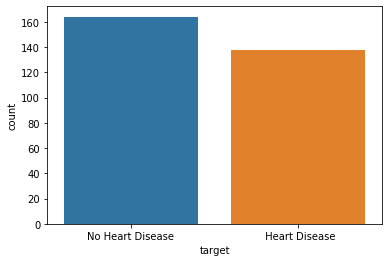

In [11]:
# countplot for number of patient with heart disease
sns.countplot(dup_data['target'])

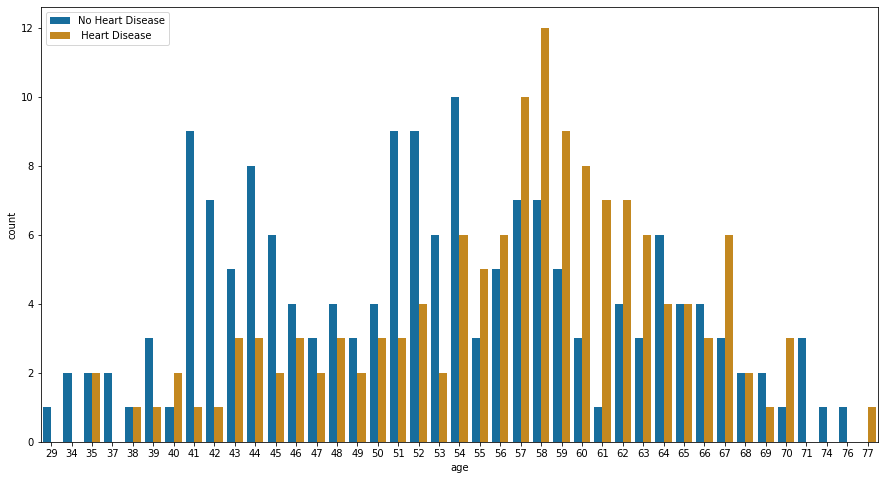

In [12]:
#no. of people with heart disease vs no heart disease
plt.figure(figsize=(15,8))
sns.countplot(x= 'age', hue= 'target', data = dup_data, palette = 'colorblind')
plt.legend(loc = 'upper left')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F406965C48>,
      dtype=object)

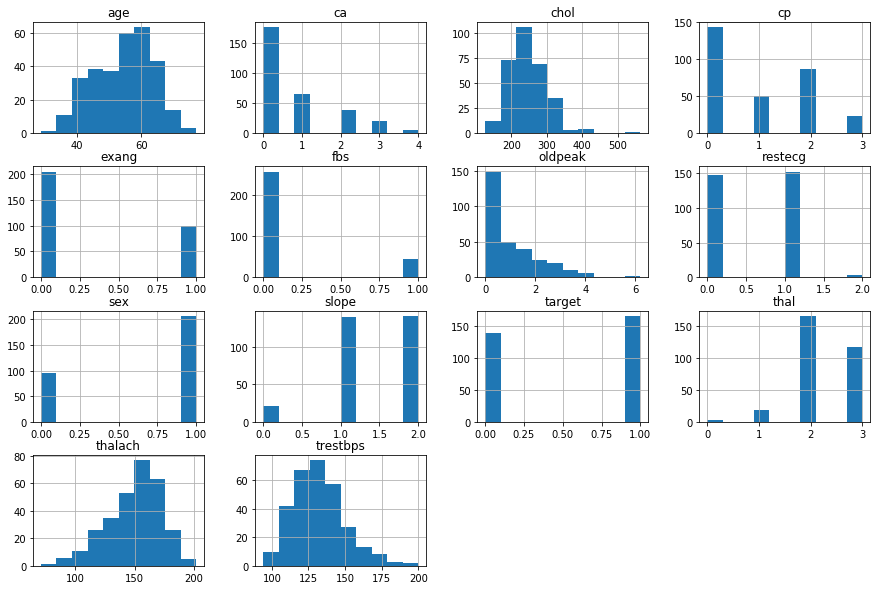

In [13]:
# Distribution of data within each column
df.hist(figsize=(15, 10))

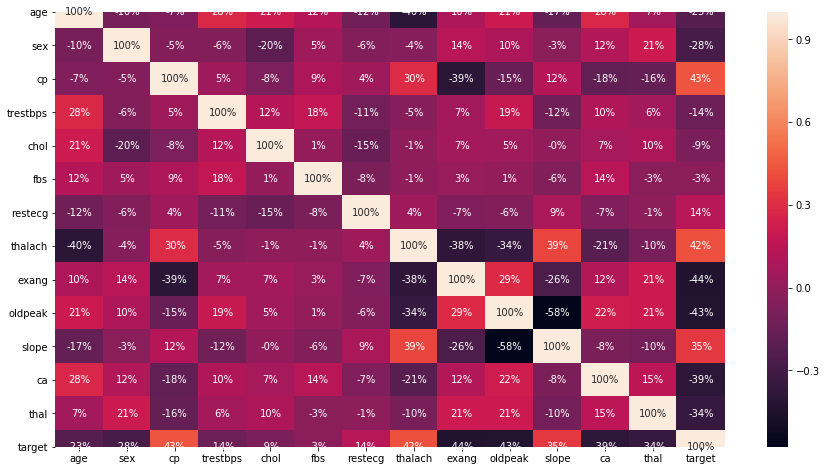

In [14]:
#correlation of the columns shown in percentage format
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, fmt ='.0%')
plt.show()

Text(0.5, 1.0, 'Correlation of Each Attribute with Target ')

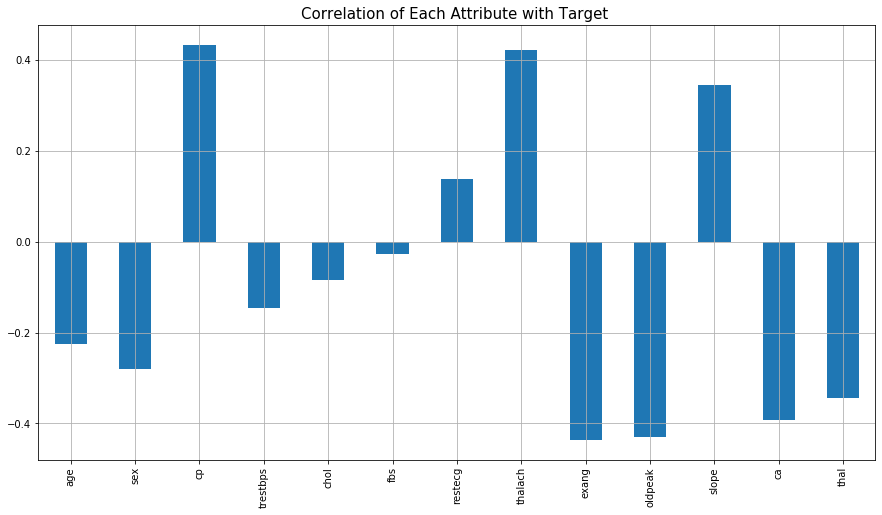

In [15]:
#Another way to check correlation of attributes with target
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(15, 8))
plt.title('Correlation of Each Attribute with Target ',fontsize = 15)

From above correlation plot, its clear that chest pain, ecg, heart rate ,peak exercise ST segment all have postive correlations with target. Age, sex, blood pressure, cholestrol,fasting blood sugar,exercise induced angina(exang),ST depression induced by exercise, number of major blood vessels, blood disorder -thalassemia all seem to have high negative correlation. 

In [16]:
# split the data into independent data( X) and dependent data (Y)
X = df.drop(columns = ['target'])
y = df['target']

In [17]:
print(X.shape)

(303, 13)


In [18]:
#split the data again, into 80% training data set and 20% testing dataset
from sklearn.model_selection import train_test_split
rs= 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= rs)


After exploring the dataset, I observed that dataset has different range. Transforming the data to comparable scales can prevent creating a bias. 

In [19]:
#Feature Scaling 
#Scale the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [20]:
print(X_train.shape)

(242, 13)


In [21]:
#Use Logisitic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = rs)
log.fit(X_train,y_train)

#test the models accuracy on training set
log.score(X_train, y_train)

C:\Users\mail4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8429752066115702

In [22]:
#Test the Logistic Regression model's accuracy on test data set
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test,log.predict(X_test))

#print the confusion matrix
print(log_cm)

# print the models accuracy on the test data
log_acc = accuracy_score(y_test,log.predict(X_test))                          
print('Logistic Regression Model Test accuracy = ', log_acc)



[[21  6]
 [ 3 31]]
Logistic Regression Model Test accuracy =  0.8524590163934426


In [23]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state=rs)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
#test the models accuracy on training set
forest.score(X_train, y_train)

0.987603305785124

In [25]:
#test the random forest classifier model's accuracy on test data set - manual calculation
forest_cm = confusion_matrix(y_test,forest.predict(X_test))

TN = forest_cm[0][0]
TP = forest_cm[1][1]
FN = forest_cm[1][0]
FP = forest_cm[0][1]

#print the confusion matrix
print(forest_cm)

# print the models accuracy on the test data
print('Random Forest Classifier Model Test accuracy = {}'. format( (TP+TN)/(TP +TN +FN+FP)))

[[24  3]
 [ 5 29]]
Random Forest Classifier Model Test accuracy = 0.8688524590163934


In [26]:
# Use DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',random_state = rs)
tree.fit(X_train,y_train)
    
#test the models accuracy on training set
tree.score(X_train, y_train)

1.0

In [27]:
#test the random forest classifier model's accuracy on test data set 
tree_cm = confusion_matrix(y_test,tree.predict(X_test))

#print the confusion matrix
print(tree_cm)

# print the models accuracy on the test data
tree_acc = accuracy_score(y_test,tree.predict(X_test))  
print('Decision Tree Classifier Model Test accuracy = {}'. format(tree_acc))

[[21  6]
 [ 6 28]]
Decision Tree Classifier Model Test accuracy = 0.8032786885245902


Random Forest Classification provided the best Accuarcy among the three algorithm that we tested. However, accuracy was recorded at approx 87% . As this is related to prediciting heart disease, lets try to create subset of all the important features, that might have high effect on providing the right prediction. 

In [28]:
# Selecting subset of columns with correlation value of higher than -30%
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','slope','thalach']
subset = df[columns]
subset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,slope,thalach
0,63,1,3,145,233,1,0,0,150
1,37,1,2,130,250,0,1,0,187
2,41,0,1,130,204,0,0,2,172
3,56,1,1,120,236,0,1,2,178
4,57,0,0,120,354,0,1,2,163


In [35]:
#split the data again, into 80% training data set and 20% testing dataset
X = subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= rs)

In [41]:
# #Feature Scaling 
# #Scale the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
#create a funtion for the models
def models(X_train,y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log1 = LogisticRegression(random_state = rs)
    log1.fit(X_train,y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree1 = DecisionTreeClassifier(criterion = 'entropy',random_state = rs)
    tree1.fit(X_train,y_train)
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest1 = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state=rs)
    forest1.fit(X_train, y_train)
    
    #print the models accuracy on the training data
    print('[0]Logisitic Regression Training Accuracy:', log1.score(X_train, y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree1.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest1.score(X_train, y_train))
    
    return log1, tree1, forest1

In [43]:
#Result of all the models
model = models(X_train, y_train)

[0]Logisitic Regression Training Accuracy: 0.7851239669421488
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9752066115702479


C:\Users\mail4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
#test models accuracy on testing data using confusion matrix
for i in range (len(model)):
    print('Model',i)
    cm = confusion_matrix(y_test,model[i].predict(X_test))
    
    print(cm)
    print('Testing Accuracy =',accuracy_score(y_test,model[i].predict(X_test)) ) 
    print()

Model 0
[[21  6]
 [ 4 30]]
Testing Accuracy = 0.8360655737704918

Model 1
[[20  7]
 [ 9 25]]
Testing Accuracy = 0.7377049180327869

Model 2
[[20  7]
 [12 22]]
Testing Accuracy = 0.6885245901639344



In [45]:
#another way to get metrics of the model
from sklearn.metrics import classification_report

for i in range (len(model)):
    print('Model',i)
        
    print(classification_report(y_test,model[i].predict(X_test)))
    print('Testing Accuracy =',accuracy_score(y_test,model[i].predict(X_test)) ) 
    print()

Model 0
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

Testing Accuracy = 0.8360655737704918

Model 1
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.78      0.74      0.76        34

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

Testing Accuracy = 0.7377049180327869

Model 2
              precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.76      0.65      0.70        34

    accuracy                           0.69        61
   macro avg       0.69   

When we created subset of independent features, Logistic regression algorithm returned the highest accuracy 83%approx. Comparing accuracy result generated with subset to previous accuracy result generated with the whole data, accuracy was higher in the later. So, it seems correct to use the whole data as each component has some relation with target and has a effect on prediciting whether a person has heart disease or not.